In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

In [43]:
# Load data into memory
data = pd.read_csv('data.csv')


In [44]:
# Split the dataset into X and Y
X = (data.drop('label', axis=1).values).T
I = (data['label'].values).T

print("Shape of X:", X.shape)


Shape of X: (784, 42000)


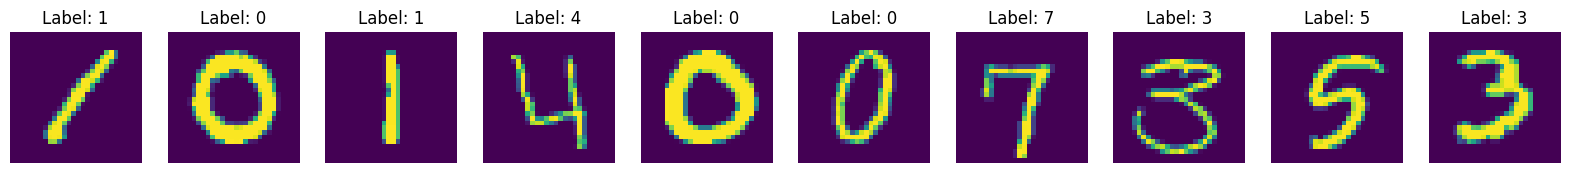

In [45]:
# Define the number of images to display
num_images = 10

# Create a figure with 10 subplots
fig, axes = plt.subplots(1, num_images, figsize=(20, 2))

for i in range(num_images):
    # Reshape the i-th image in X into a 16x16 array
    image = X[:, i].reshape(28, 28)
    
    # Display the i-th image
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {I[i]}")
    axes[i].axis('off')

plt.show()

In [46]:
#implementing spliting data into training and testing
def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Split the data into training and testing
#(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X_C1_C2, I_C1_C2, 7000)
#print(Xtrain.shape, Xtest.shape)


Shape of X_C1_C2: (784, 8423)
(784, 860) (784, 825)
The label of x is 3


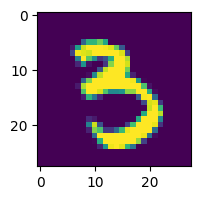

The label of x is 3


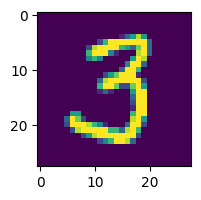

The label of x is 4


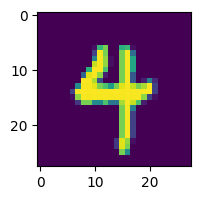

The label of x is 4


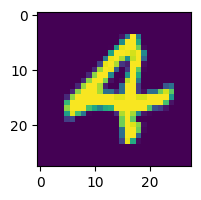

The label of x is 4


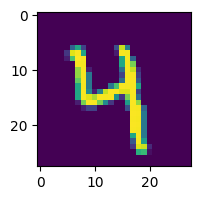

Misclassification number: 46
Accuracy: 0.9727002967359051
Shape of X_C1_C2: (784, 8146)
(784, 771) (784, 859)
The label of x is 5


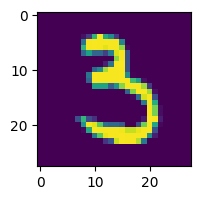

The label of x is 3


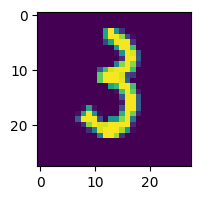

The label of x is 5


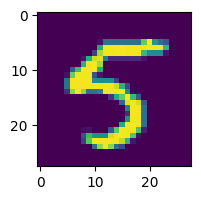

The label of x is 5


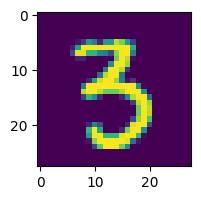

The label of x is 3


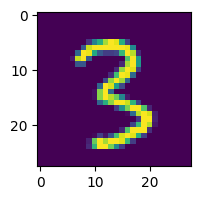

Misclassification number: 446
Accuracy: 0.7263803680981595


In [48]:
def classify(a,b):
    # Create a boolean mask that is True for the indices of I where the digit is 3 or 4
    mask = (I == a) | (I == b)

    # Use the mask to extract the corresponding columns from X
    X_C1_C2 = X[:, mask]
    I_C1_C2 = I[mask]
    print("Shape of X_C1_C2:", X_C1_C2.shape)
    n=X_C1_C2.shape[1]
    (Xtrain, Ytrain), (Xtest, Ytest) = split_data(X_C1_C2, I_C1_C2, (n*80)//100)

    #we have already transposed the data in the beginning
    X1=Xtrain[:,Ytrain==a]
    X2=Xtrain[:,Ytrain==b]
    X1_test=Xtest[:,Ytest==a]
    X2_test=Xtest[:,Ytest==b]

    print(X1_test.shape,X2_test.shape)
    # Compute the SVD of X1 and X2
    U1, s1, VT1 = np.linalg.svd(X1,full_matrices=False)
    U2, s2, VT2 = np.linalg.svd(X2,full_matrices=False)
    S1=np.diag(s1)
    S2=np.diag(s2)

    for i in range(5):
    #length of test set
        Ntest=Xtest.shape[1]
        n=np.random.randint(0,Ntest)

        #take a random data from test set
        x=Xtest[:,n]

        #project x onto the subspace spanned by the columns of U1 and U2
        Y1=U1@ (U1.T@x)
        Y2=U2@ (U2.T@x)

        #compute the distance between x and the two subspaces
        d1=np.linalg.norm(x-Y1,2)
        d2=np.linalg.norm(x-Y2,2)

        #predict the label of x
        if d1<d2:
            print(f"The label of x is {a}")
        else:   
            print(f"The label of x is {b}")

        #display the image of x
        plt.figure(figsize=(2,2))
        plt.imshow(x.reshape(28,28))
        plt.show()

        #initialize the missclassification number
    miss=0

    # Repeat the experiment for each unique value of y
    for i in range(Xtest.shape[1]):
        x_t=Xtest[:,i]
        y_t=Ytest[i]

        #project x onto the subspace spanned by the columns of U1 and U2
        Y1=U1@ (U1.T@x_t)
        Y2=U2@ (U2.T@x_t)

        #compute the distance between x and the two subspaces
        d1_3=np.linalg.norm(x_t-Y1,2)
        d2_4=np.linalg.norm(x_t-Y2,2)
        if d1_3<d2_4 and y_t==b:
            miss+=1
        elif d1_3>d2_4 and y_t==a:
            miss+=1
        
    #print the result
    print(f"Misclassification number: {miss}")
    accuracy=1-miss/(X1_test.shape[1]+X2_test.shape[1])
    print(f"Accuracy: {accuracy}")


classify(3,4)
classify(5,3)


Shape of X_C1_C2: (784, 12218)
(784, 842) (784, 843) (784, 759)
The label of x is 3


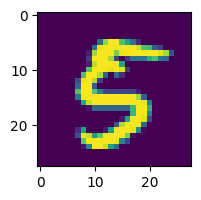

The label of x is 5


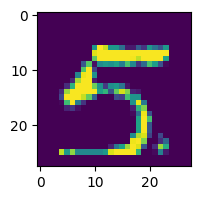

The label of x is 5


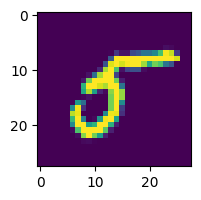

The label of x is 5


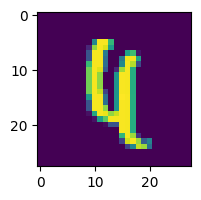

The label of x is 5


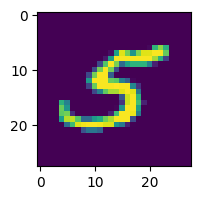

Misclassification number: 508
Accuracy: 0.6985163204747775


In [41]:
#extension of the code
def classify_3(a,b,c):
    # Create a boolean mask that is True for the indices of I where the digit is 3 or 4
    mask = (I == a) | (I == b) | (I == c)

    # Use the mask to extract the corresponding columns from X
    X_C1_C2 = X[:, mask]
    I_C1_C2 = I[mask]
    print("Shape of X_C1_C2:", X_C1_C2.shape)
    n=X_C1_C2.shape[1]
    (Xtrain, Ytrain), (Xtest, Ytest) = split_data(X_C1_C2, I_C1_C2, (n*80)//100)

    #we have already transposed the data in the beginning
    X1=Xtrain[:,Ytrain==a]
    X2=Xtrain[:,Ytrain==b]
    X3=Xtrain[:,Ytrain==c]
    X1_test=Xtest[:,Ytest==a]
    X2_test=Xtest[:,Ytest==b]
    X3_test=Xtest[:,Ytest==c]

    print(X1_test.shape,X2_test.shape,X3_test.shape)
    # Compute the SVD of X1 and X2
    U1, s1, VT1 = np.linalg.svd(X1,full_matrices=False)
    U2, s2, VT2 = np.linalg.svd(X2,full_matrices=False)
    U3, s3, VT3 = np.linalg.svd(X3,full_matrices=False)
    S1=np.diag(s1)
    S2=np.diag(s2)
    S3=np.diag(s3)

    for i in range(5):
    #length of test set
        Ntest=Xtest.shape[1]
        n=np.random.randint(0,Ntest)

        #take a random data from test set
        x=Xtest[:,n]

        #project x onto the subspace spanned by the columns of U1 and U2
        Y1=U1@ (U1.T@x)
        Y2=U2@ (U2.T@x)
        Y3=U3@ (U3.T@x)

        #compute the distance between x and the two subspaces
        d1=np.linalg.norm(x-Y1,2)
        d2=np.linalg.norm(x-Y2,2)
        d3=np.linalg.norm(x-Y3,2)

        if np.min([d1,d2,d3])==d1:
            print(f"The label of x is {a}")
        elif np.min([d1,d2,d3])==d2:
            print(f"The label of x is {b}")
        else:
            print(f"The label of x is {c}")
   
        #display the image of x
        plt.figure(figsize=(2,2))
        plt.imshow(x.reshape(28,28))
        plt.show()

        #initialize the missclassification number
    miss=0

    # Repeat the experiment for each unique value of y
    for i in range(Xtest.shape[1]):
        x_t=Xtest[:,i]
        y_t=Ytest[i]

        #project x onto the subspace spanned by the columns of U1 and U2
        Y1=U1@ (U1.T@x_t)
        Y2=U2@ (U2.T@x_t)
        Y3=U3@ (U3.T@x_t)

        #compute the distance between x and the two subspaces
        d1_3=np.linalg.norm(x_t-Y1,2)
        d2_4=np.linalg.norm(x_t-Y2,2)
        d3_5=np.linalg.norm(x_t-Y3,2)

        if np.min([d1_3,d2_4,d3_5])==d1_3 and y_t!=a:
            miss+=1
        elif np.min([d1_3,d2_4,d3_5])==d2_4 and y_t!=b:
            miss+=1
        elif np.min([d1_3,d2_4,d3_5])==d3_5 and y_t!=c:
            miss+=1
        
    #print the result
    print(f"Misclassification number: {miss}")
    accuracy=1-miss/(X1_test.shape[1]+X2_test.shape[1])
    print(f"Accuracy: {accuracy}")

classify_3(3,4,5)